In [2]:
import pandas as pd
df = pd.read_csv('/Users/roberto/Desktop/steam_reviews.csv')

In [3]:
# Converte the timestamp variables from int to seconds
import datetime as dt

df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit = 's')
df['timestamp_updated'] = pd.to_datetime(df['timestamp_updated'], unit = 's')
df['author.last_played'] = pd.to_datetime(df['author.last_played'], unit = 's')

In [4]:
import pandas as pd

# Step 1: Group by 'author.steamid' and count the number of reviews for each reviewer
review_counts = df.groupby('author.steamid').size().reset_index(name='review_count')

# Step 2: Sort the reviewers by 'review_count' in descending order
top_reviewers = review_counts.sort_values(by='review_count', ascending=False).head(10)

# Step 3: Display the top 10 reviewers
print(top_reviewers)

            author.steamid  review_count
2409169  76561198062813911           149
7571900  76561198315585536           132
5773563  76561198192166873           107
6348755  76561198239163744           106
1849199  76561198045381877           103
2478679  76561198064946151           100
960101   76561198013146396            99
1329539  76561198027973295            96
128759   76561197969749884            88
425671   76561197989746995            86


In [5]:
#filter the original dataset to include only reviews from these top reviewers
top_reviewer_ids = top_reviewers['author.steamid']
top_reviews = df[df['author.steamid'].isin(top_reviewer_ids)]

#Count the number of reviews per language for these top reviewers
language_counts = top_reviews.groupby('language').size().reset_index(name='count')

#Calculate the percentage of each language
total_reviews = language_counts['count'].sum()
language_counts['percentage'] = (language_counts['count'] / total_reviews) * 100

#Display the result
print(language_counts[['language', 'percentage']])

   language  percentage
0   english   53.939962
1   russian   28.142589
2  schinese   17.917448


In [6]:
# Step 3: Calculate the average number of helpful votes for each of these top reviewers
helpful_votes_avg = top_reviews.groupby('author.steamid')['votes_helpful'].mean().reset_index(name='avg_helpful_votes')

# Step 4: Merge this with the top_reviewers DataFrame to see both review count and average helpful votes
top_reviewers_summary = pd.merge(top_reviewers, helpful_votes_avg, on='author.steamid')

# Step 5: Display the summary for analysis
print(top_reviewers_summary)

      author.steamid  review_count  avg_helpful_votes
0  76561198062813911           149           0.885906
1  76561198315585536           132          49.712121
2  76561198192166873           107          38.897196
3  76561198239163744           106           7.641509
4  76561198045381877           103           2.252427
5  76561198064946151           100           3.990000
6  76561198013146396            99           0.969697
7  76561198027973295            96          11.802083
8  76561197969749884            88          26.238636
9  76561197989746995            86          21.058140


### Analysis of Top 10 Reviewers: Review Count vs. Average Helpful Votes

This table provides insights into the reviewing behavior and perceived value of the top 10 reviewers, based on their total reviews (`review_count`) and the average number of helpful votes (`avg_helpful_votes`) they received:

| author.steamid     | review_count | avg_helpful_votes |
|--------------------|--------------|--------------------|
| 76561198062813911  | 149          | 0.88              |
| 76561198315585536  | 132          | 49.71             |
| 76561198192166873  | 107          | 38.90             |
| 76561198239163744  | 106          | 7.64              |
| 76561198045381877  | 103          | 2.25              |
| 76561198064946151  | 100          | 3.99              |
| 76561198013146396  | 99           | 0.97              |
| 76561198027973295  | 96           | 11.80             |
| 76561197969749884  | 88           | 26.24             |
| 76561197989746995  | 86           | 21.06             |

#### Key Observations

1. **High Variation in Helpful Votes**
   - The average helpful votes range widely, from as low as **0.88** to as high as **49.71**. This shows that some reviewers’ contributions are highly valued, while others receive minimal positive feedback.

2. **High-Value Contributors**
   - **Reviewer `76561198315585536`** (49.71) and **`76561198192166873`** (38.90) have the highest average helpful votes, indicating that their reviews are especially valued by the community. Their reviews are perceived as helpful and likely provide insightful or detailed information.
   - **Reviewers `76561197969749884`** (26.24) and **`76561197989746995`** (21.06) also contribute valuable content, though with fewer reviews.

3. **Low-Value/Low-Quality Reviewers**
   - Reviewers like **`76561198062813911`** (0.88) and **`76561198013146396`** (0.97) show very low helpful votes despite their high review counts, indicating that their reviews may not resonate with users. This suggests they may be posting low-quality or spam-like content.
   - **Reviewers `76561198045381877`** (2.25) and **`76561198064946151`** (3.99) also have low helpful votes, though they don’t appear as extreme as the lowest-scoring reviewers.

4. **Quantity vs. Quality**
   - The reviewer with the highest `review_count` (**149 reviews**), `76561198062813911`, has one of the lowest `avg_helpful_votes` at **0.88**, suggesting a focus on quantity over quality.
   - Conversely, reviewers with moderate counts, like **`76561198315585536`** and **`76561198192166873`**, have high helpfulness scores, suggesting that quality is more valued than quantity by the community.

#### Summary
This analysis reveals a mixed landscape among the top 10 reviewers:
- Some consistently provide high-quality reviews valued by the community, while others may prioritize quantity over quality, resulting in lower helpfulness scores.
- These findings underscore the community's preference for quality over sheer volume in reviews.


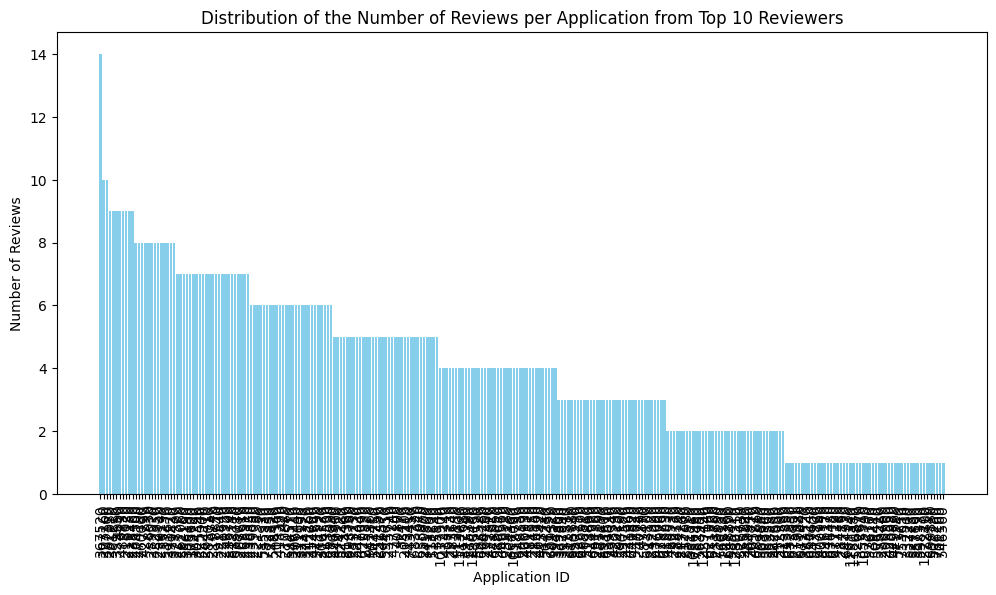

In [8]:
import matplotlib.pyplot as plt
# Step 3: Count the number of reviews per application by these top reviewers
app_review_counts = top_reviews['app_id'].value_counts().reset_index()
app_review_counts.columns = ['app_id', 'review_count']

# Step 4: Sort the application review counts in descending order
app_review_counts = app_review_counts.sort_values(by='review_count', ascending=False)

# Step 5: Plot the results
plt.figure(figsize=(12, 6))
plt.bar(app_review_counts['app_id'].astype(str), app_review_counts['review_count'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Application ID')
plt.ylabel('Number of Reviews')
plt.title('Distribution of the Number of Reviews per Application from Top 10 Reviewers')
plt.show()


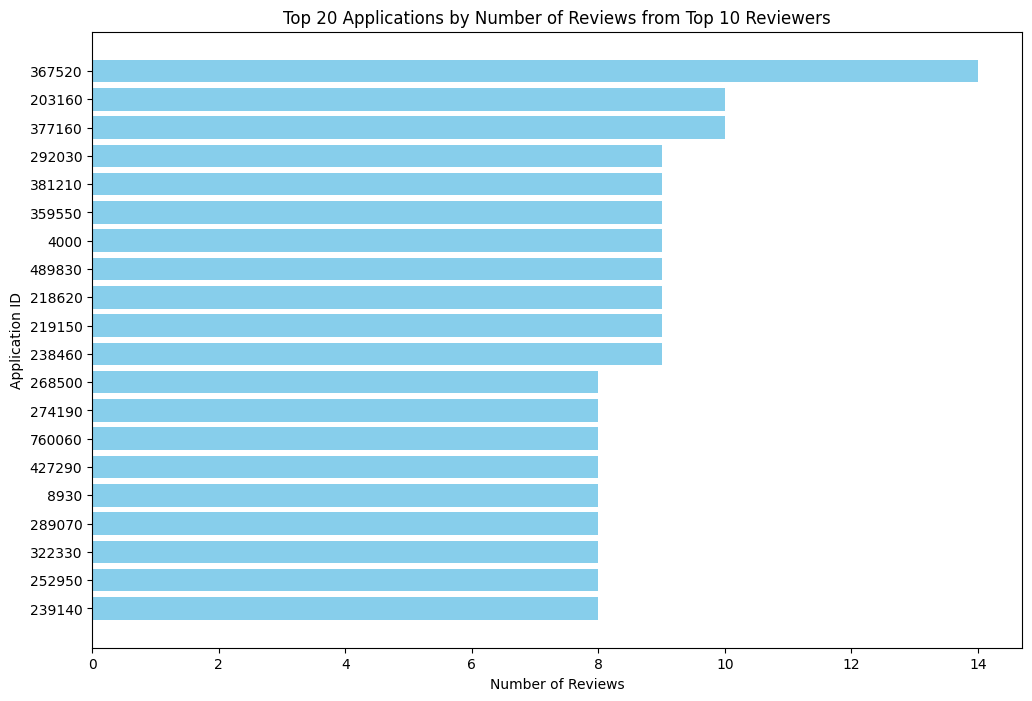

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already identified and filtered the top 10 reviewers
# Step 3: Count the number of reviews per application by these top reviewers
app_review_counts = top_reviews['app_id'].value_counts().reset_index()
app_review_counts.columns = ['app_id', 'review_count']

# Step 4: Sort the application review counts in descending order and limit to top 20 applications
app_review_counts = app_review_counts.sort_values(by='review_count', ascending=False).head(20)

# Step 5: Plot the results using a horizontal bar chart for better readability
plt.figure(figsize=(12, 8))
plt.barh(app_review_counts['app_id'].astype(str), app_review_counts['review_count'], color='skyblue')
plt.xlabel('Number of Reviews')
plt.ylabel('Application ID')
plt.title('Top 20 Applications by Number of Reviews from Top 10 Reviewers')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
plt.show()


## Analysis of English and Spanish Reviewers on Steam

This analysis investigates the behavior of English and Spanish-speaking reviewers on Steam. Specifically, we aimed to determine:
1. **Which group (English or Spanish) is more likely to edit their reviews after submitting them.**
2. **The average number of games owned by reviewers in each group.**
3. **The average number of reviews written by each group.**

Through these steps, we explored patterns in editing behavior, game ownership, and reviewing frequency among English and Spanish-speaking communities.

### Step-by-Step Process

### Step 1: Filter Data for English and Spanish Reviews

We began by filtering the dataset to create separate subsets for English and Spanish reviewers. This allows us to calculate statistics independently for each group.

```python
# Filter data to include only English and Spanish reviews
english_reviews = df[df['language'] == 'english']
spanish_reviews = df[df['language'] == 'spanish']


In [10]:
import pandas as pd

# Step 1: Filter for English and Spanish reviews
english_reviews = df[df['language'] == 'english']
spanish_reviews = df[df['language'] == 'spanish']

# Step 2: Determine the likelihood of editing/updating reviews
# Check if `timestamp_created` and `timestamp_updated` are different
english_edit_rate = (english_reviews['timestamp_created'] != english_reviews['timestamp_updated']).mean()
spanish_edit_rate = (spanish_reviews['timestamp_created'] != spanish_reviews['timestamp_updated']).mean()

print(f"Proportion of English reviews that were edited: {english_edit_rate:.2%}")
print(f"Proportion of Spanish reviews that were edited: {spanish_edit_rate:.2%}")

# Step 3: Calculate the average number of games owned and reviews written for each group
english_avg_games_owned = english_reviews['author.num_games_owned'].mean()
spanish_avg_games_owned = spanish_reviews['author.num_games_owned'].mean()

english_avg_reviews_written = english_reviews['author.num_reviews'].mean()
spanish_avg_reviews_written = spanish_reviews['author.num_reviews'].mean()

print(f"Average number of games owned by English reviewers: {english_avg_games_owned:.2f}")
print(f"Average number of games owned by Spanish reviewers: {spanish_avg_games_owned:.2f}")

print(f"Average number of reviews written by English reviewers: {english_avg_reviews_written:.2f}")
print(f"Average number of reviews written by Spanish reviewers: {spanish_avg_reviews_written:.2f}")


Proportion of English reviews that were edited: 11.89%
Proportion of Spanish reviews that were edited: 9.94%
Average number of games owned by English reviewers: 1369501.66
Average number of games owned by Spanish reviewers: 121.92
Average number of reviews written by English reviewers: 456456.87
Average number of reviews written by Spanish reviewers: 9.39


Median games owned by English reviewers: 84.0
95th percentile of games owned by English reviewers: 569.0


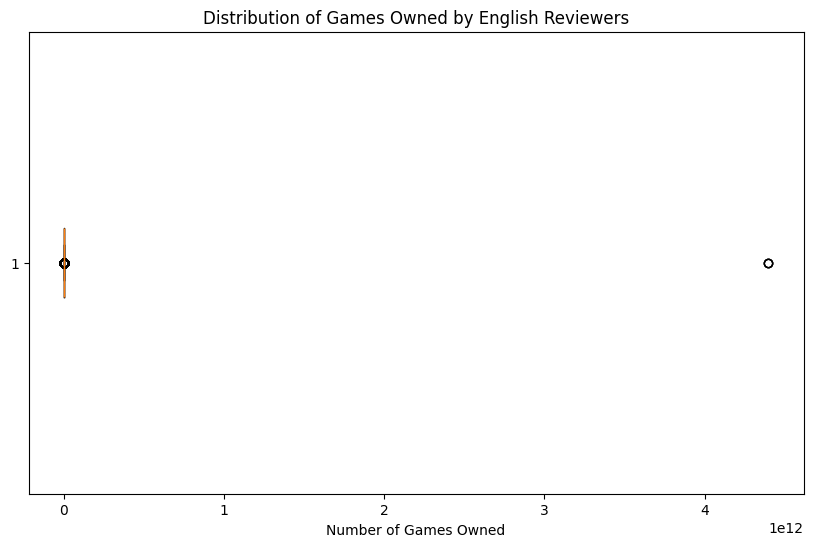

In [11]:
import matplotlib.pyplot as plt

# Filter English-speaking reviewers
english_reviews = df[df['language'] == 'english']

# Descriptive statistics
english_median_games_owned = english_reviews['author.num_games_owned'].median()
english_95th_percentile = english_reviews['author.num_games_owned'].quantile(0.95)

print(f"Median games owned by English reviewers: {english_median_games_owned}")
print(f"95th percentile of games owned by English reviewers: {english_95th_percentile}")

# Plot the distribution to spot outliers
plt.figure(figsize=(10, 6))
plt.boxplot(english_reviews['author.num_games_owned'].dropna(), vert=False)
plt.title("Distribution of Games Owned by English Reviewers")
plt.xlabel("Number of Games Owned")
plt.show()


In [12]:
# Cap games owned at the 95th percentile (569) for English reviewers
english_reviews['num_games_owned_capped'] = english_reviews['author.num_games_owned'].clip(upper=english_95th_percentile)

# Calculate the mean with capped values
capped_mean_games_owned = english_reviews['num_games_owned_capped'].mean()
print(f"Mean games owned by English reviewers (capped): {capped_mean_games_owned:.2f}")


Mean games owned by English reviewers (capped): 141.56


/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_62713/2768213632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_reviews['num_games_owned_capped'] = english_reviews['author.num_games_owned'].clip(upper=english_95th_percentile)


In [13]:
# Remove outliers above a threshold (e.g., 1000 games)
filtered_english_reviews = english_reviews[english_reviews['author.num_games_owned'] <= 1000]

# Calculate the mean with outliers removed
filtered_mean_games_owned = filtered_english_reviews['author.num_games_owned'].mean()
print(f"Mean games owned by English reviewers (outliers removed): {filtered_mean_games_owned:.2f}")


Mean games owned by English reviewers (outliers removed): 139.82


In [14]:
# Step 1: Calculate the proportion of edited reviews
# English reviewers
english_edit_rate = (english_reviews['timestamp_created'] != english_reviews['timestamp_updated']).mean()
# Spanish reviewers
spanish_reviews = df[df['language'] == 'spanish']
spanish_edit_rate = (spanish_reviews['timestamp_created'] != spanish_reviews['timestamp_updated']).mean()

print(f"Proportion of English reviews that were edited: {english_edit_rate:.2%}")
print(f"Proportion of Spanish reviews that were edited: {spanish_edit_rate:.2%}")

# Step 2: Calculate the average number of games owned and reviews written for each group

# Re-calculate mean games owned for English group, using outliers removed value from previous step
english_avg_games_owned = filtered_mean_games_owned  # from previous outlier removal result (139.82)

# Calculate for Spanish reviewers, with outlier removal if necessary
# Checking the 95th percentile for Spanish reviewers
spanish_95th_percentile = spanish_reviews['author.num_games_owned'].quantile(0.95)

# Removing outliers in the Spanish group (e.g., games owned > 1000)
filtered_spanish_reviews = spanish_reviews[spanish_reviews['author.num_games_owned'] <= 1000]
spanish_avg_games_owned = filtered_spanish_reviews['author.num_games_owned'].mean()

# Average number of reviews written by English and Spanish reviewers
english_avg_reviews_written = english_reviews['author.num_reviews'].mean()
spanish_avg_reviews_written = spanish_reviews['author.num_reviews'].mean()

# Display the results
print(f"Average number of games owned by English reviewers (outliers removed): {english_avg_games_owned:.2f}")
print(f"Average number of games owned by Spanish reviewers (outliers removed): {spanish_avg_games_owned:.2f}")
print(f"Average number of reviews written by English reviewers: {english_avg_reviews_written:.2f}")
print(f"Average number of reviews written by Spanish reviewers: {spanish_avg_reviews_written:.2f}")


Proportion of English reviews that were edited: 11.89%
Proportion of Spanish reviews that were edited: 9.94%
Average number of games owned by English reviewers (outliers removed): 139.82
Average number of games owned by Spanish reviewers (outliers removed): 102.76
Average number of reviews written by English reviewers: 456456.87
Average number of reviews written by Spanish reviewers: 9.39


In [15]:
# Calculate the 95th percentile of reviews written for English and Spanish reviewers to identify outliers
english_95th_reviews = english_reviews['author.num_reviews'].quantile(0.95)
spanish_95th_reviews = spanish_reviews['author.num_reviews'].quantile(0.95)

# Cap the number of reviews written at the 95th percentile for each group
# This approach prevents extreme values from skewing the mean
english_reviews['num_reviews_capped'] = english_reviews['author.num_reviews'].clip(upper=english_95th_reviews)
spanish_reviews['num_reviews_capped'] = spanish_reviews['author.num_reviews'].clip(upper=spanish_95th_reviews)

# Recalculate the average number of reviews written after capping
english_avg_reviews_written = english_reviews['num_reviews_capped'].mean()
spanish_avg_reviews_written = spanish_reviews['num_reviews_capped'].mean()

# Display the updated results
print(f"Average number of reviews written by English reviewers (capped): {english_avg_reviews_written:.2f}")
print(f"Average number of reviews written by Spanish reviewers (capped): {spanish_avg_reviews_written:.2f}")


Average number of reviews written by English reviewers (capped): 9.25
Average number of reviews written by Spanish reviewers (capped): 7.32


/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_62713/3462382748.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_reviews['num_reviews_capped'] = english_reviews['author.num_reviews'].clip(upper=english_95th_reviews)
/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_62713/3462382748.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spanish_reviews['num_reviews_capped'] = spanish_reviews['author.num_reviews'].clip(upper=spanish_95th_reviews)


In [16]:
# Cap the number of reviews written at the 95th percentile for each group using .loc
english_reviews.loc[:, 'num_reviews_capped'] = english_reviews['author.num_reviews'].clip(upper=english_95th_reviews)
spanish_reviews.loc[:, 'num_reviews_capped'] = spanish_reviews['author.num_reviews'].clip(upper=spanish_95th_reviews)

# Recalculate the average number of reviews written after capping
english_avg_reviews_written = english_reviews['num_reviews_capped'].mean()
spanish_avg_reviews_written = spanish_reviews['num_reviews_capped'].mean()

# Display the updated results
print(f"Average number of reviews written by English reviewers (capped): {english_avg_reviews_written:.2f}")
print(f"Average number of reviews written by Spanish reviewers (capped): {spanish_avg_reviews_written:.2f}")


Average number of reviews written by English reviewers (capped): 9.25
Average number of reviews written by Spanish reviewers (capped): 7.32


In [17]:
# Create copies of the DataFrames
english_reviews_capped = english_reviews.copy()
spanish_reviews_capped = spanish_reviews.copy()

# Cap the number of reviews written at the 95th percentile for each group
english_reviews_capped['num_reviews_capped'] = english_reviews_capped['author.num_reviews'].clip(upper=english_95th_reviews)
spanish_reviews_capped['num_reviews_capped'] = spanish_reviews_capped['author.num_reviews'].clip(upper=spanish_95th_reviews)

# Recalculate the average number of reviews written after capping
english_avg_reviews_written = english_reviews_capped['num_reviews_capped'].mean()
spanish_avg_reviews_written = spanish_reviews_capped['num_reviews_capped'].mean()

# Display the updated results
print(f"Average number of reviews written by English reviewers (capped): {english_avg_reviews_written:.2f}")
print(f"Average number of reviews written by Spanish reviewers (capped): {spanish_avg_reviews_written:.2f}")

Average number of reviews written by English reviewers (capped): 9.25
Average number of reviews written by Spanish reviewers (capped): 7.32
